## TDA@YSDA

### Homework 1

In [40]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles

### Task 1 (2 points)

Compute the homology of spaces/complexes with coefficients in a chosen field $\mathbb{F}$ (you may vary it). Triangulate spaces if needed. 

1) the space accorting to your variant:

1. torus,
2. Klein bottle,
3. projective plane,
4. donut (double torus).

2) the simplcial complex with given vertices and simplices according to your variant:

1. The vertex set of non-zero vectors in $GF(2)^3$ (7 vertices total), and simplices spanned by linearly independent vertices.
2. The vertex set given by $\{1,2,3,a,b,c,d,\&,*,!\}$, simplices are given by the all possible combinations of a digit, letter and symbol.
3. The vertex set given by $\{0,1,2,...,11\}$, simplices are given by $\{x~\textrm{mod}~12, x+3~\textrm{mod}~12, x+7~\textrm{mod}~12\}$ or $\{x~\textrm{mod}~12, x+4~\textrm{mod}~12, x+7~\textrm{mod}~12\}$.
4. The vertex set is given by $[n]$, simplices are given by all sets of vertices, without consecutive numbers.

![Projective plane](./img/spaces.png)

In [ ]:
# your TeX here

### Task 2 (3 points)

Consider the standard algorithm for computing persistent homology of a filtered simplicial complex $K$. Given a boundary matrix of a filtration $\mathbf{B}$, the task is to obtain a reduced matrix $\mathbf{R}$. Out of reduced matrix one can obtain the persistent pairing $P$ given by the column-row indices of the non-zero columns of $\mathbf{B}$, and the persistent diagram $D$ given by the correspoding filtration function value for the pairing.

![Matrix reduction](../seminar2/img/reduction.png)

Consider the $2$-skeleton of the Vietoris-Rips filtration of a set $X \in \mathbb{R}^2$ sampled from a circle.

In [41]:
X, _ = make_circles(n_samples=(30, 0), noise=0.15, random_state=42)

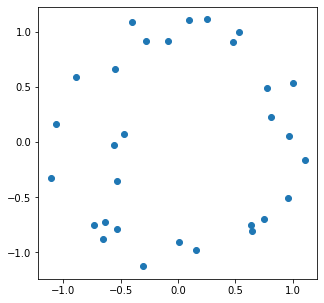

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1])
plt.show()

The $2$-skeleton of a filtered Vietoris-Rips complex have $X$ as the vertex set of cardinality $n$, with simplices up to dimension $2$, given by all possible $k$ out of $n$ combinations of vertices.

Simplices (thus columns of the boundary matrix $\mathbf{B}$) in the Vietoris-Rips filtration are ordered by the following rule:

- filtration function value, with $f(\sigma)=0$ for vertices, $f(\sigma)=d(x_i, x_j)$ for edges, and $f(\sigma) = \max_{(x_i, x_j) \in \sigma} d(x_i, x_j)$ for all other simplices,
- simplex dimension,
- lexicographic order given by any ordering of the vertices.

#### Task

Implement the standard algorithm using any language of choice. Given a set of vertices $X$ compute the boundary matrix of its Vietoris-Rips filtration $\mathbf{B}$, the reduced matrix $\mathbf{R}$, persistent pairing $P_{VR}(X)$ and persistent diagram $D_{VR}(X)$.

In [12]:
# your code here

### Task 3 (2 points)

#### Task

Given $n$ vertices generate random pairwise distances according to a chosen distribution. Compute the persistent diagram of the Vietoris-Rips filtration and plot the following diagrams statistics against $n$:
- sum of persistences for $H_0$ and $H_1$,
- maxima of birth, death and persistence times for $H_0$ and $H_1$.

In [ ]:
# your code here

### Task 4 (4 points max)

#### Problem
Persistence diagram is a multiset of vectors $D = \{(b_i, d_i, h_i)\}_{i=1}^N$ where $b_i$, $d_i$ are the birth and death times of $i$-th topological feature of dimension $h_i$. The classic approach to introduce persistent diagrams to machine learning is related to distances and kernels defined on the space of diagrams, which takes $O(n^2)$ time to compute. Vectrorization schemes such as persistence [images](https://arxiv.org/abs/1507.06217), [landscapes](https://arxiv.org/abs/1501.00179) or [curves](https://arxiv.org/abs/1904.07768) reduce the time to $O(n)$, yet all of this approaches are more or less fixed.

Trainable vectorization allows to learn vector representations of persistence diagrams, optimal w.r.t. the downstream task such as classification or regression. The simplest of such models, [Deep Sets](https://arxiv.org/abs/1703.06114) - $f: (\mathbb{R}^3)^N \rightarrow \mathbb{R}^d$

\begin{equation}
f(\{x_1, \dots, x_N\}) = \rho \left( \sum_{i=1}^N \phi(x_i) \right),
\end{equation}

consists of an encoder $\phi_\theta: \mathbb{R}^3 \rightarrow \mathbb{R}^D$ mapping each diagram point $x_i = (b_i, d_i, h_i)$, with parameters $\theta$ shared between points, a permutation invariant pooling operation $(\cdot): (\mathbb{R}^D)^N \rightarrow \mathbb{R}^D$ to obtain a representation of a diagram at whole (particulary for Deep Sets - sum pooling), and a decoder $\rho: \mathbb{R}^D \rightarrow \mathbb{R}^d$ which further transforms the diagram representation. It was [shown](https://arxiv.org/abs/1904.09378) that certain combinations of encoder/pooling/decoder correspond to the fixed representation schemes of persistence diagrams.

Deep sets encoder vectorizes each single point independently and does not consider the interdependence between points in the diagram. Thus, the self-attention block from the Transformer model which allows to capture those dependencies is a natural plug-in replacement to the encoder $\phi$.

\begin{equation}
\Phi_{ATTN}(\{x_1, \dots, x_N\}) = \left(\frac{(\mathbf{W}_q \mathbf{X})(\mathbf{W}_k \mathbf{X})^T}{\sqrt{D}} \right)\mathbf{W}_v\mathbf{X},
\end{equation}

where $\Phi_{ATTN}: (\mathbb{R}^3)^N \rightarrow (\mathbb{R}^D)^N$.

Yet, Transformers are known to be unstable to train, for example requiring the warm-up period. A recent line of work tries to address this issues, either experimenting with placing Layer Normalization block [[link](https://arxiv.org/abs/2002.04745), [link](https://arxiv.org/abs/1910.05895)], or removing it completely [[link]](https://arxiv.org/abs/2003.04887), effectively removing the warm-up period. There is also other architecture choices such as the type of self-attention, different from classic dot-product [[link](https://arxiv.org/abs/2006.04710),[link](https://arxiv.org/abs/2110.11773),[link](https://arxiv.org/abs/2005.09561)], $k$-ary permutation pooling [[link]](https://arxiv.org/abs/1811.01900), or learnable pooling instead of fixed one [[link]](https://arxiv.org/abs/1810.00825).

#### Task

Train the transformer model with various architecture choices on the _ORBIT5K_ TDA benchmark dataset, with 70/30 train/test split (_ORBIT100K_, if you are not limited in computational power). Report the average and standard deviation of the best achived performance over 10 runs. Conclude which architecture choices: _a)_ bring most performance gain, _b)_ allows for faster and more stable training.

Things to experiment with:
- layer normalization placement/ReZero,
- self-attention variants (L2, double-stochastic, non-normalized),
- learnable pooling vs fixed such as max/mean/sum,
- cross-attention.

Baseline accuracies (_ORBIT5K_):
- Persistence images: $84.8$ 
- Perslay: $87.7$
- Persformer: $90.4$

#### Points

You can receive up to 4 points for this task depending on the ranked overall results quartile.

In [69]:
def generate_orbit(point_0, r, n=1000):
    
    X = np.zeros([n, 2])
    
    xcur, ycur = point_0[0], point_0[1]
    
    for idx in range(n):
        xcur = (xcur + r * ycur * (1. - ycur)) % 1
        ycur = (ycur + r * xcur * (1. - xcur)) % 1
        X[idx, :] = [xcur, ycur]
    
    return X

In [78]:
def generate_orbits(m, rs=[2.5, 3.5, 4.0, 4.1, 4.3], n=1000, random_state=None):
    
    # m orbits, each of n points of dimension 2
    orbits = np.zeros((m * len(rs), n, 2))
    
    # for each r
    for j, r in enumerate(rs):

        # initial points
        points_0 = random_state.uniform(size=(m,2))

        for i, point_0 in enumerate(points_0):
            orbits[j*m + i] = generate_orbit(points_0[i], rs[j])
            
    return orbits

#### ORBIT5K dataset

Persistence Images: A Stable Vector Representation of Persistent Homology. _Adams et al._ (2017) [[link]](https://arxiv.org/abs/1507.06217)

In [79]:
random_state = np.random.RandomState(42)
X_orbit5k = generate_orbits(1000, random_state=random_state)

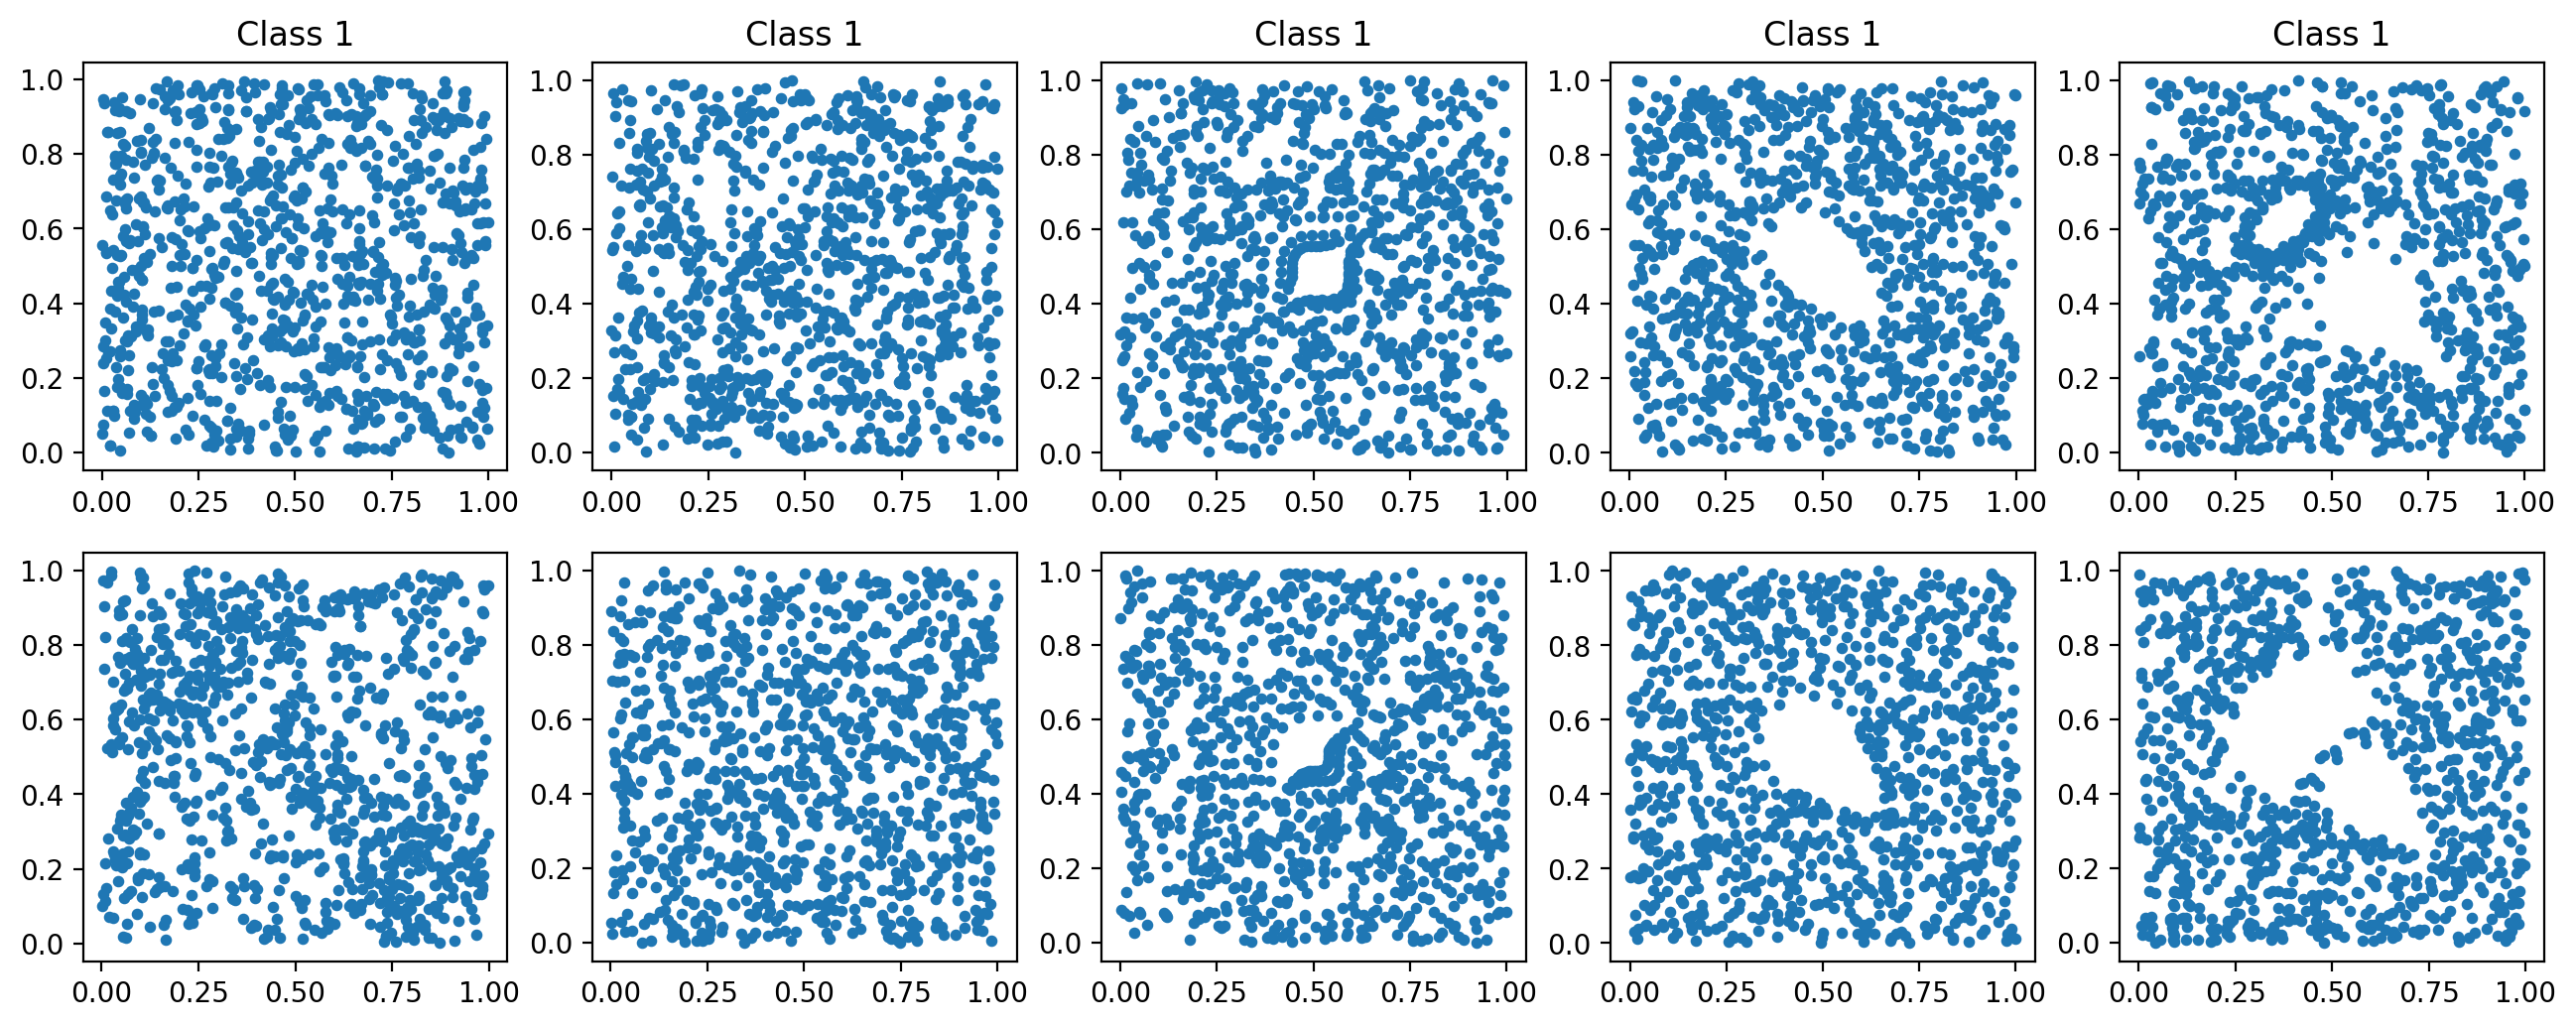

In [84]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), dpi=200)
for i in range(2):
    for j in range(5):
        if i==0:
            ax[i,j].set_title("Class {}".format(i+1))
        ax[i,j].scatter(X_orbit5k[j*1000+i,:,0], X_orbit5k[j*1000+i,:,1], s=10)

In [ ]:
# your code here

#### References

Models:

- Deep Sets [[link]](https://arxiv.org/abs/1703.06114)
- Perslay [[link]](https://arxiv.org/abs/1904.09378)
- Persformer [[link]](https://arxiv.org/abs/2112.15210)
- Set Transformer [[link]](https://arxiv.org/abs/1810.00825)

General tips:

- Training Tips for the Transformer Model [[link]](https://arxiv.org/abs/1804.00247)
- Understanding the Difficulty of Training Transformers [[link]](https://arxiv.org/abs/2004.08249)
- Universal Approximation of Functions on Sets [[link]](https://arxiv.org/abs/2107.01959)

Alternatives to the dot-product self-attention:
- The Lipschitz Constant of Self-Attention (L2 attention) [[link]](https://arxiv.org/abs/2006.04710)
- Sinkformers: Transformers with Doubly Stochastic Attention (doubly stochatic attention) [[link]](https://arxiv.org/abs/2110.11773)
- Normalized Attention Without Probability Cage (non-normalized attention) [[link]](https://arxiv.org/abs/2005.09561)

Layer normalization (where to put LN? pre or post?):

- On Layer Normalization in the Transformer Architecture [[link]](https://arxiv.org/abs/2002.04745)
- Transformers without Tears: Improving the Normalization of Self-Attention [[link]](https://arxiv.org/abs/1910.05895)

Alternatives to layer normalization:
- ReZero is All You Need: Fast Convergence at Large Depth (no normalization at all, no warmup) [[link]](https://arxiv.org/abs/2003.04887)
- NormFormer: Improved Transformer Pretraining with Extra Normalization [[link]](https://arxiv.org/abs/2110.09456)

Alternative permutation-invariant pooling:

- Janossy pooling ($k$-ary permutation pooling) [[link](https://arxiv.org/abs/1811.01900), [link](https://arxiv.org/abs/2107.01959)]
- Set Transformer (learn pooling operation instead of max/mean/sum) [[link]](https://arxiv.org/abs/1810.00825)

Cross-attention (attending to learned vector, fixed attention matrix size):
- Perceiver: General Perception with Iterative Attention [[link]](https://arxiv.org/abs/2103.03206)
- Visual Parser: Representing Part-whole Hierarchies with Transformers [[link](https://arxiv.org/abs/2107.05790)